In [1]:
# Importing all the essential Python libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime
import yfinance as yf

In [2]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
# Importing Infosys stock prices using yfinance

INFY = yf.download('INFY.BO', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Some Basic info about the Infosys Stock

INFY.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY.BO,INFY.BO,INFY.BO,INFY.BO,INFY.BO,INFY.BO
count,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,1627.693758,1660.435206,1675.754995,1644.816252,1659.073958,3.405321e+05
std,186.800362,177.309417,179.737056,175.056663,176.660409,5.081375e+05
min,1368.305786,1394.400024,1412.949951,1359.099976,1387.000000,1.639500e+04
25%,1452.104401,1493.799988,1508.649963,1485.774994,1497.137482,1.329968e+05
50%,1605.185730,1651.400024,1665.000000,1636.424988,1648.650024,2.212485e+05
75%,1831.506439,1841.799988,1864.612457,1822.662537,1842.749969,3.557505e+05
max,1947.338135,1969.500000,1990.900024,1952.000000,1969.900024,6.022096e+06


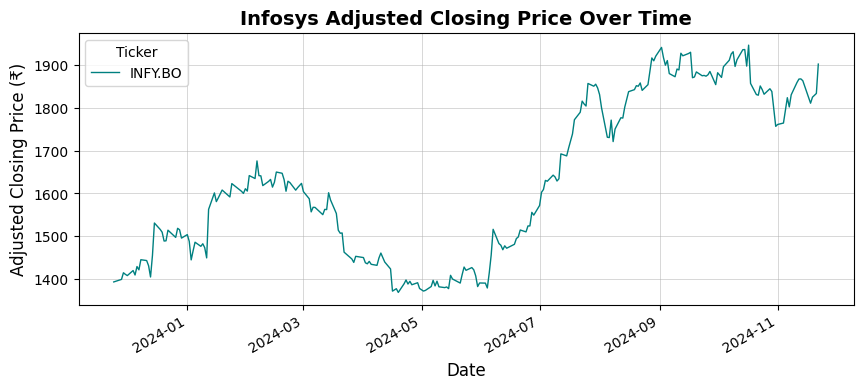

In [5]:
# Plotting Adjusted Closing Price for Infosys Stock

INFY['Adj Close'].plot(legend=True, figsize=(10, 4), color='teal', linewidth=1)

plt.title("Infosys Adjusted Closing Price Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Closing Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(["INFY.BO"], loc='upper left', fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

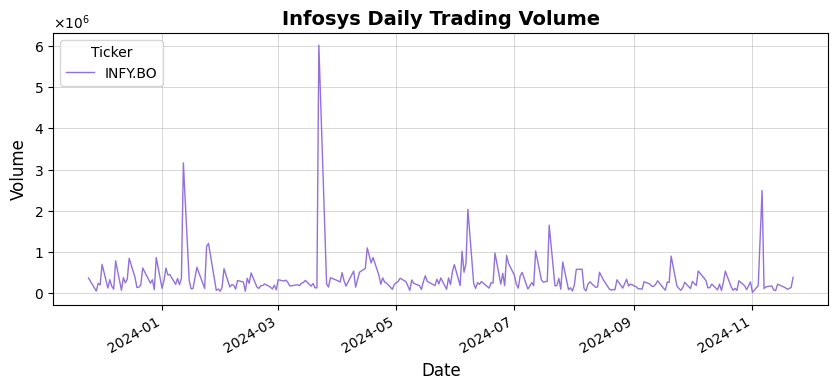

In [6]:
# Plotting the total volume of Infosys stock being traded each day

INFY['Volume'].plot(legend=True, figsize=(10, 4), color='mediumpurple', linewidth=1)

plt.title("Infosys Daily Trading Volume", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(["INFY.BO"], loc='upper left', fontsize=10)
legend.set_title("Ticker", prop={'size': 10})

plt.show()

In [7]:
# Calculating Moving Average for 10, 20, and 50 days of the stock price

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    INFY[column_name] = INFY['Adj Close'].rolling(window=ma).mean()

INFY.head()

Price,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Ticker,INFY.BO,INFY.BO,INFY.BO,INFY.BO,INFY.BO,INFY.BO,,,
Date,,,,,,,,,
2023-11-24,1392.878296,1436.949951,1452.599976,1433.650024,1443.449951,365783,NaN,NaN,NaN
2023-11-28,1398.791260,1443.050049,1445.349976,1427.500000,1444.000000,49263,NaN,NaN,NaN
2023-11-29,1414.348877,1459.099976,1459.949951,1448.250000,1448.250000,239199,NaN,NaN,NaN
2023-11-30,1410.665527,1455.300049,1460.800049,1449.900024,1455.949951,198380,NaN,NaN,NaN
2023-12-01,1407.709106,1452.250000,1460.400024,1446.050049,1457.650024,697935,NaN,NaN,NaN


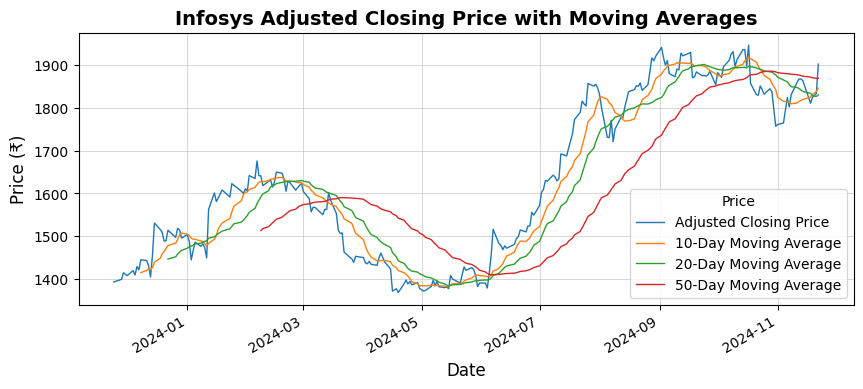

In [8]:
# Plotting the moving averages and Adjusted Closing Price for Infosys Stock

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 4), linewidth=1)

plt.title("Infosys Adjusted Closing Price with Moving Averages", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

legend = plt.legend(
    ["Adjusted Closing Price", "10-Day Moving Average", "20-Day Moving Average", "50-Day Moving Average"], 
    loc='lower right', 
    fontsize=10
)
legend.set_title("Price", prop={'size': 10})

plt.show()

In [9]:
# Calculate Daily Returns

INFY['Daily Return'] = INFY['Adj Close'].pct_change()

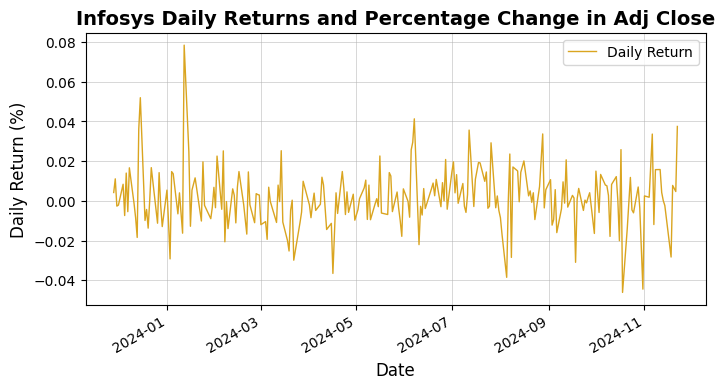

In [10]:
# Plotting Daily Returns as a function of Percent Change in Adjusted Close Value

INFY['Daily Return'].plot(figsize=(8, 4), color='goldenrod', linewidth=1)

plt.title("Infosys Daily Returns and Percentage Change in Adj Close", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.legend(["Daily Return"], loc='upper right', fontsize=10)

plt.show()

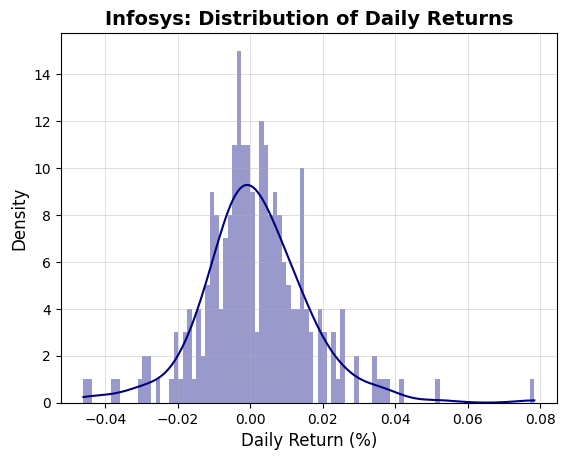

In [11]:
# Plotting the average daily returns of the stock

sns.histplot(INFY['Daily Return'].dropna(), bins=100, kde=True, edgecolor=None, alpha=0.4, color='navy', linewidth=1)

plt.title("Infosys: Distribution of Daily Returns", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.4)

plt.show()

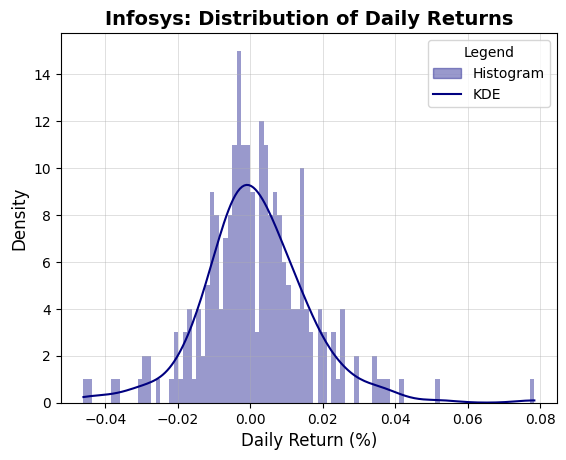

In [12]:
# Create the histogram and KDE plot
hist = sns.histplot(
    INFY['Daily Return'].dropna(), 
    bins=100, 
    kde=True, 
    edgecolor=None, 
    alpha=0.4, 
    color='navy', 
    linewidth=1, 
    label='Histogram'
)

# Extract the KDE for the legend
kde_line = hist.lines[0]  # The first line corresponds to the KDE

# Customize the plot
plt.title("Infosys: Distribution of Daily Returns", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.4)

# Add the legend with both elements
plt.legend(
    [plt.Rectangle((0, 0), 1, 1, color='navy', alpha=0.4), kde_line], 
    ['Histogram', 'KDE'], 
    title='Legend', 
    fontsize=10
)

plt.show()

In [13]:
# Comparing Risk and Expected returns

rets = INFY['Daily Return'].dropna()
area = np.pi*15

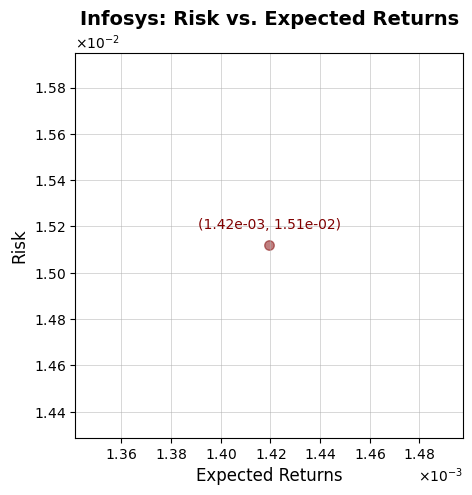

In [14]:
# Creating the scatter plot

plt.figure(figsize=(5, 5))
plt.scatter(rets.mean(), rets.std(), s=area, color='maroon', alpha=0.5)
plt.title("Infosys: Risk vs. Expected Returns", fontsize=14, fontweight='bold')

# Mean of Daily Returns
plt.xlabel("Expected Returns", fontsize=12)

# Standard Deviation of Daily Returns
plt.ylabel("Risk", fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

coords_text = f"({rets.mean():.2e}, {rets.std():.2e})"
plt.annotate(coords_text,xy=(rets.mean(), rets.std()),xytext=(rets.mean(), rets.std() + 0.00007), fontsize=10, ha='center', color='maroon')

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [15]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

INFY['Daily Return'].quantile(0.05)

-0.020064081112419842

In [16]:
# Monte Carlo Simulation

days = 365
dt = 1/days
mu = rets.mean()
sigma = rets.std()

In [17]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

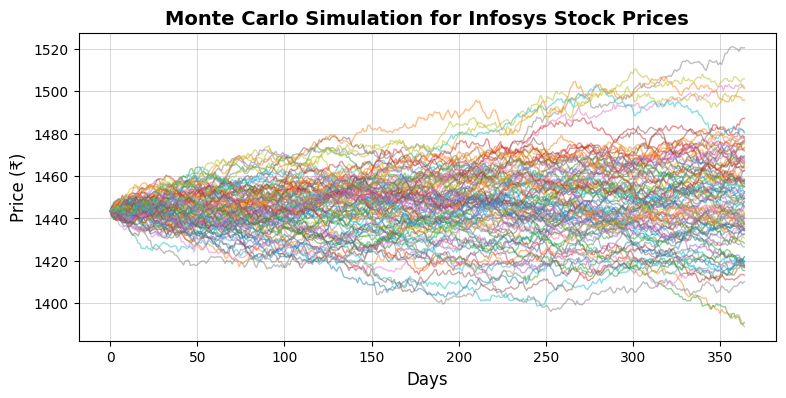

In [18]:
# Running the Monte Carlo simulation a hundred times

start_price = INFY['Open'].iloc[0].item()

# Monte Carlo Simulation Plot
plt.figure(figsize=(9, 4))

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), linewidth=1, alpha=0.5)

plt.title("Monte Carlo Simulation for Infosys Stock Prices", fontsize=14, weight='bold')
plt.xlabel("Days", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()

In [19]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

q = np.percentile(simulations,1)

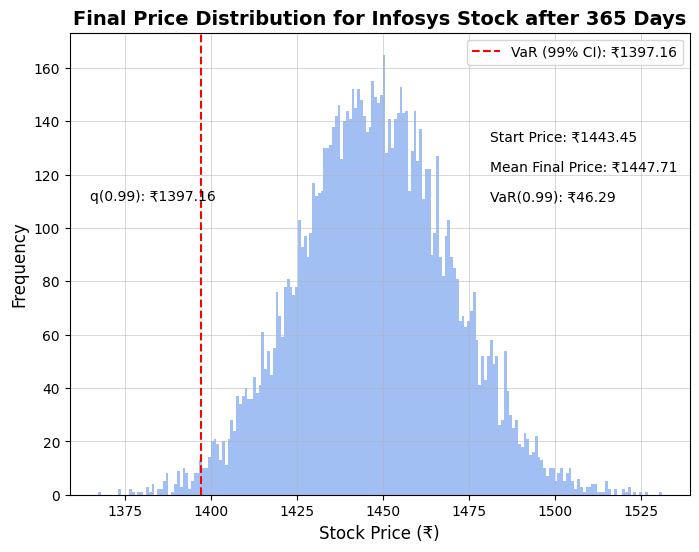

In [20]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.figure(figsize=(8, 6))

plt.hist(simulations, bins=200, color='cornflowerblue', alpha=0.6)

plt.figtext(0.65, 0.7, s=f"Start Price: ₹{start_price:.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.65, s=f"Mean Final Price: ₹{simulations.mean():.2f}", fontsize=10, color='black')
plt.figtext(0.65, 0.6, s=f"VaR(0.99): ₹{start_price - q:.2f}", fontsize=10, color='black')
plt.figtext(0.15, 0.6, s=f"q(0.99): ₹{q:.2f}", fontsize=10, color='black')

plt.axvline(x=q, linewidth=1.5, color='red', linestyle='--', label=f"VaR (99% CI): ₹{q:.2f}")

plt.title(f"Final Price Distribution for Infosys Stock after {days} Days", fontsize=14, weight='bold')
plt.xlabel("Stock Price (₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend(loc="upper right", fontsize=10)

plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.5)

plt.show()